In [9]:
import sys,glob,os,pickle
import numpy as np
from netCDF4 import Dataset,netcdftime,num2date
import pandas as pd
import seaborn as sns  
import matplotlib.pylab as plt 


sys.path.append('/Users/peterpfleiderer/Documents/Projects/country_analysis/country_analysis_scripts/')
try:del sys.modules['country_analysis'] 
except:pass
from country_analysis import country_analysis
sys.path.append('/Users/peterpfleiderer/Documents/')

SEN=country_analysis('SEN','/Users/peterpfleiderer/Documents/Projects/country_analysis/')
SEN.load_from_tar('/Users/peterpfleiderer/Documents/Projects/country_analysis/SEN.tar.gz')


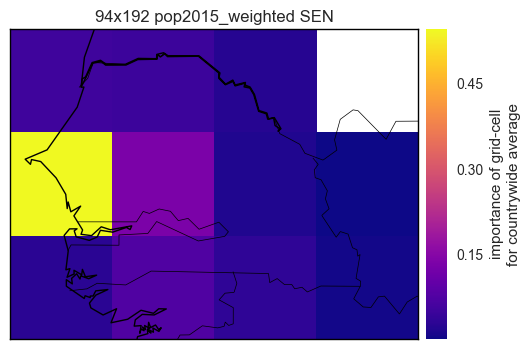

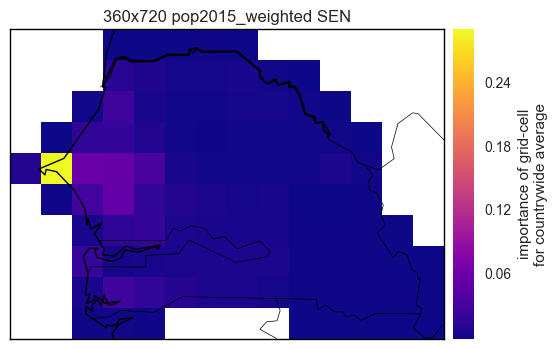

In [10]:
###############
# show masks
###############

# standard plot
SEN.plot_map(meta_data=['94x192','pop2015_weighted','SEN'],source='_masks')

SEN.plot_map(meta_data=['360x720','pop2015_weighted','SEN'],source='_masks')


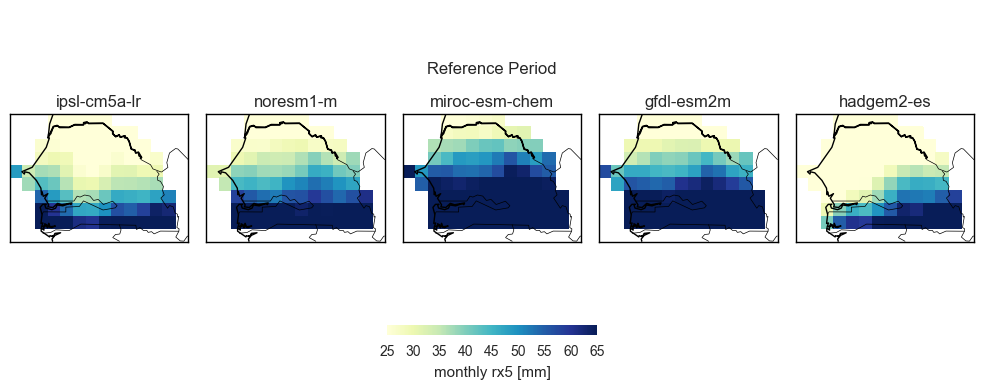

In [28]:
# compute period average
SEN.period_averages(periods={'ref':[1986,2006],'2030s':[2025,2045],'2040s':[2035,2055]})

# custom plots
fig, axes = plt.subplots(nrows=1, ncols=5,figsize=(10,3.5))
axes=axes.flatten()
count=0
for model in SEN._data['pr']['CMIP5']['rcp8.5'].keys():
    im=SEN.plot_map(meta_data=['pr','CMIP5','rcp8.5',model],period='ref',source='_data',ax=axes[count],title=model,show=False,color_bar=False,color_palette=plt.cm.YlGnBu,color_range=[25,65])
    count+=1
    
cbar_ax=fig.add_axes([0.1,0.05,0.8,0.2])
cbar_ax.axis('off')
cb=fig.colorbar(im,orientation='horizontal',label='monthly rx5 [mm]')

plt.suptitle('\n\n\nReference Period')
plt.tight_layout()
plt.show()

/Users/peterpfleiderer/anaconda/envs/py_masks/lib/python2.7/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
country_analysis.py:659: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  ax.plot(tmp['time'],pd.rolling_mean(tmp[mask_style][region],running_mean),linestyle='-',label=label)


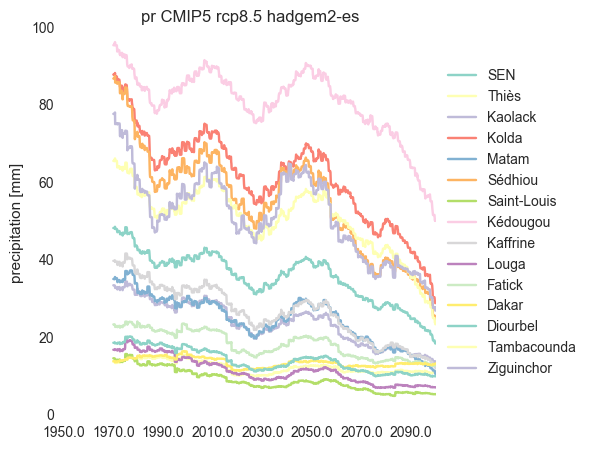

not yearly data! please consider this for the running mean


In [12]:
# plot regional transients
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(6,5))
axes.set_color_cycle(sns.color_palette("Set3",len(SEN._regions)))
axes.set_axis_bgcolor('white')
for name in SEN._regions:
	comment=SEN.plot_transient(meta_data=['pr','CMIP5','rcp8.5','hadgem2-es'],mask_style='lat_weighted',region=name.encode('utf-8'),ax=axes,running_mean=240,show=False,ylabel='precipitation [mm]',label=name)

box = axes.get_position()
axes.set_position([box.x0, box.y0, box.width * 0.8, box.height])
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

print comment


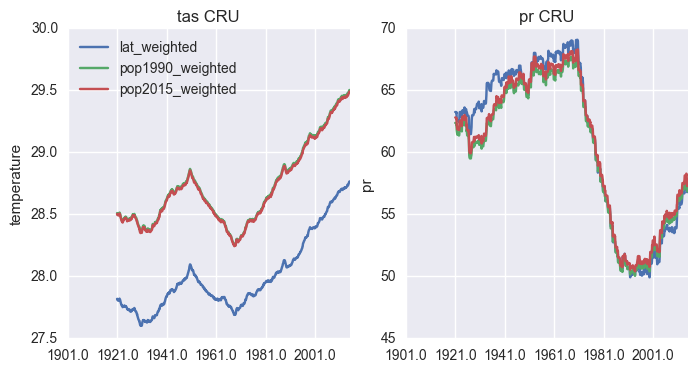

In [14]:
# different averaging styles

# plot
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(8,4))
for mask_style in ['lat_weighted','pop1990_weighted','pop2015_weighted']:
    SEN.plot_transient(meta_data=['tas','CRU'],mask_style=mask_style,ax=axes[0],running_mean=240,show=False,ylabel='temperature',label=mask_style)
    
for mask_style in ['lat_weighted','pop1990_weighted','pop2015_weighted']:
    SEN.plot_transient(meta_data=['pr','CRU'],mask_style=mask_style,ax=axes[1],running_mean=240,show=False,label=mask_style)

axes[0].legend(loc='upper left')
plt.show()

In [22]:
for model in SEN._data['pr']['CMIP5']['rcp8.5'].keys():
    print model

ipsl-cm5a-lr
noresm1-m
miroc-esm-chem
gfdl-esm2m
hadgem2-es
